The first step is parsing the URL.
There are 10 results per page, and the urls is showed in the following  pics:

I need Name, Detail, Rating, Number of Reviews, Address, and Phone Number of each place.

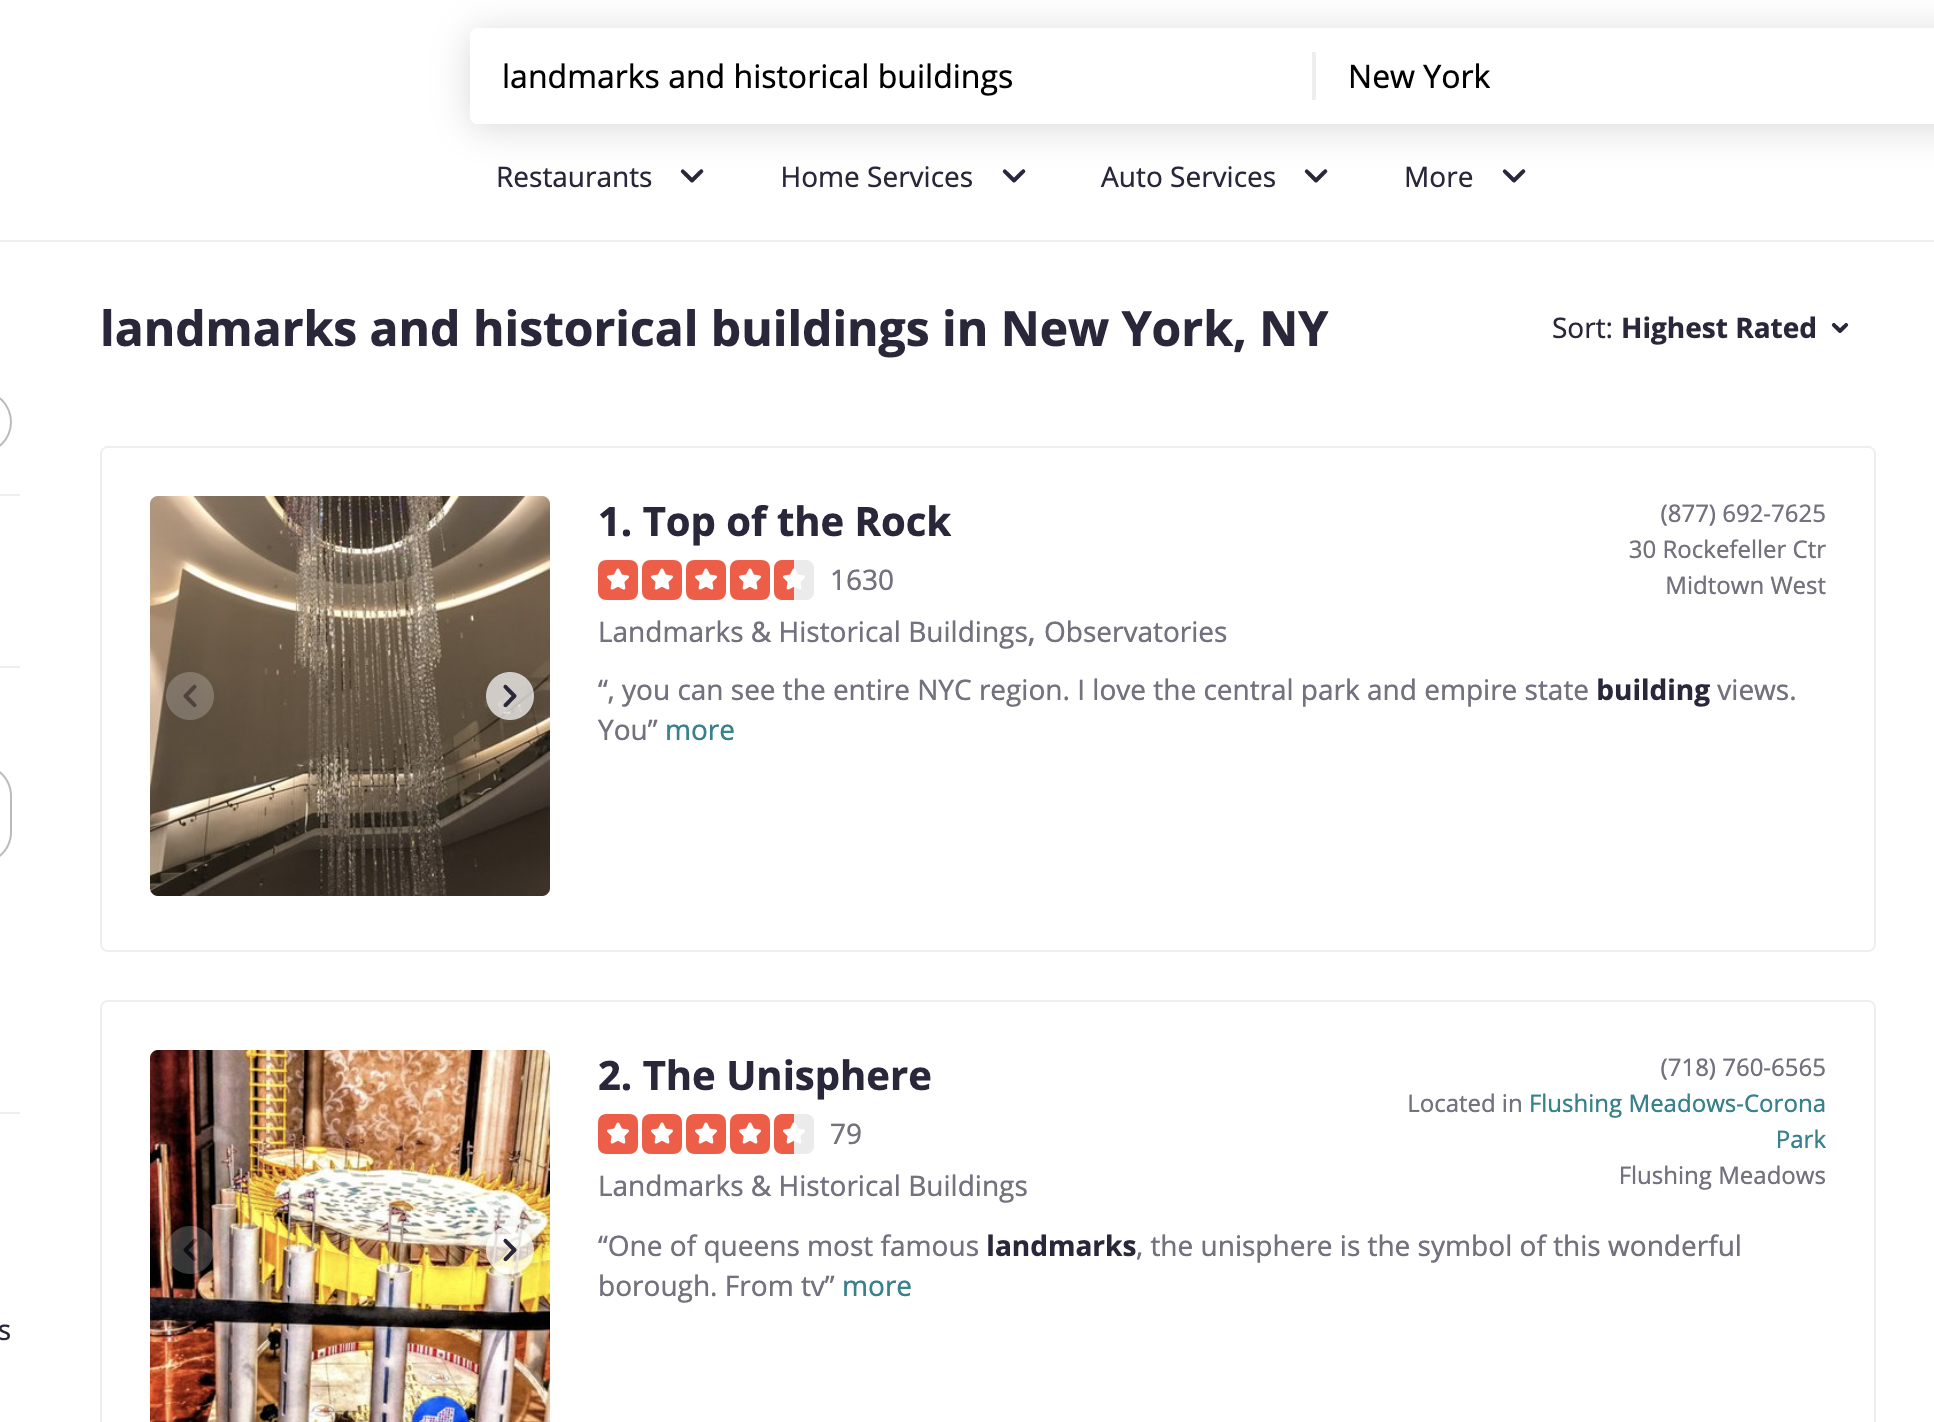

So the urls' difference between different pages is the start position. The the url is: 
https://www.yelp.com/search?cflt=landmarks&find_desc=Landmarks%20%26%20Historical%20Buildings&find_loc=New%20York&start=

Thus the pattern is https://www.yelp.com/search?find_desc={target}&find_loc={area}&start={page_num}0

If I want to change the page, I need to change the parameter which presents the start postion, for example, the first page's parameter is 0, the second id 10.


Another essential step is parsing the content of the request and extract everything we need.
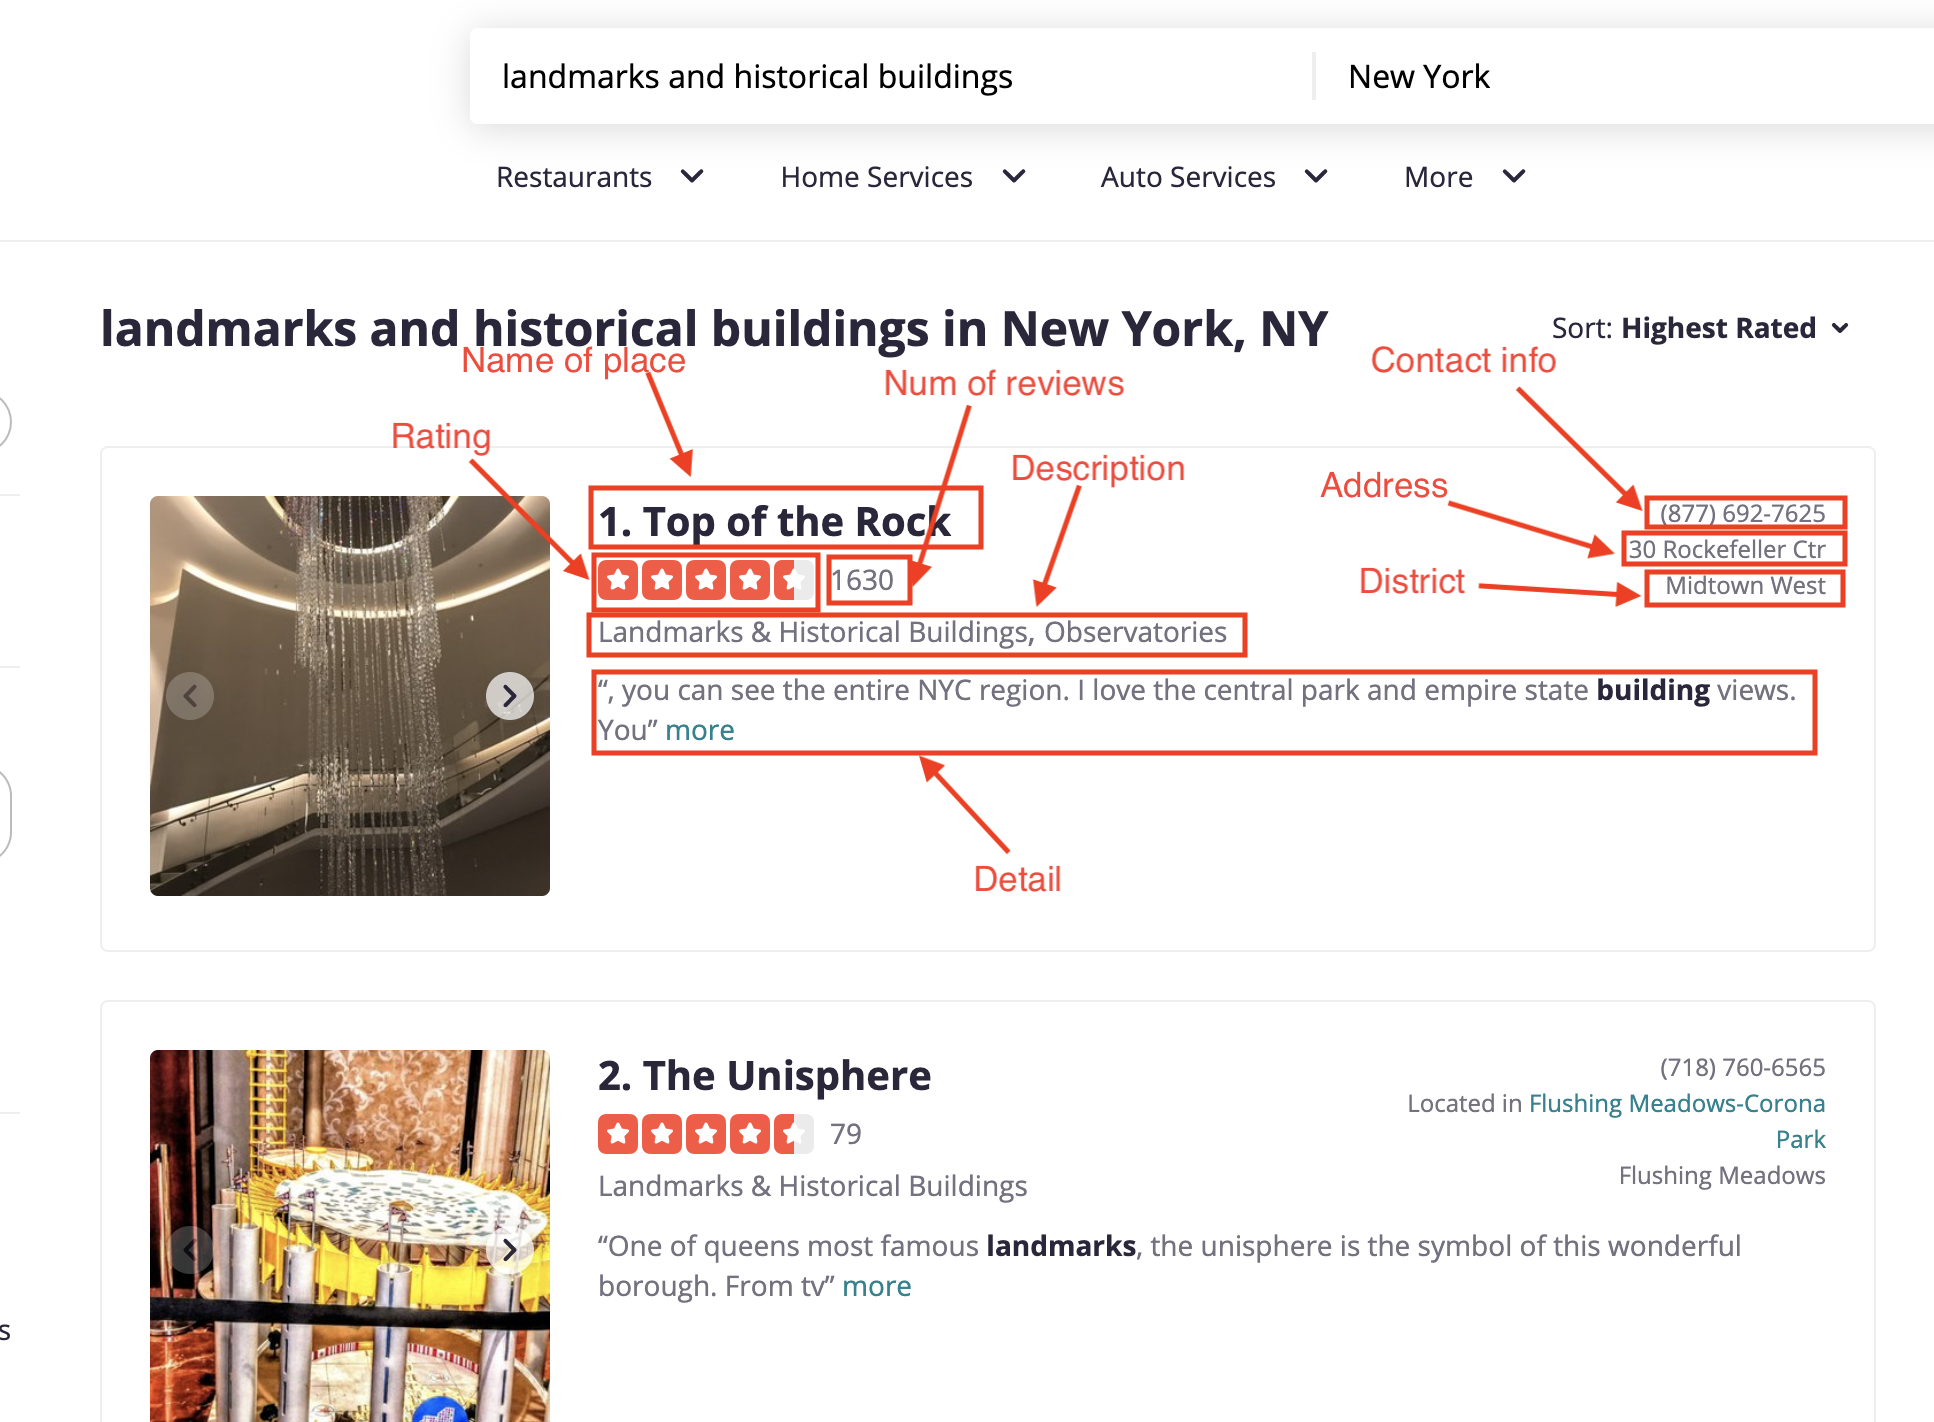

After determining what information we want on the target website, next step is to find all the xpath of the data item.

Because I cant use the terminal on colab, I create a scrapy project on my local computer and do the crawling work locally and I upload the crawling result here.
You can have a view of the web spider project:

https://github.com/lzaj99/yelp_spider.git

My example here is the landmarks and historical buildings in New York, but you can search any other service and location in the crawler.


In [ ]:
import pandas as pd
df = pd.read_json('example.json')
df

,fetched_time,name,rating,num_of_reviews,address,district,contact_info,description,detail
0,2021-01-18 06:25:09,100 Steps,5.0,2,Ogden Ave,,,Landmarks & Historical Buildings,“Lots of steps! Many a night biking back from ...
1,2021-01-18 06:25:09,Stone Street Historic District,4.5,11,Stone St,Financial District,,Landmarks & Historical Buildings,“There aren't many older streets than Stone St...
2,2021-01-18 06:25:09,Van Gogh’s Ear,5.0,2,30 Rockefeller Plz,Midtown East,,Landmarks & Historical Buildings,"“""Van Gogh's Ear"", a public art sculpture by E..."
3,2021-01-18 06:25:09,Oculus,4.5,303,World Trade Center Transportation Hub,Financial District,,Landmarks & Historical Buildings,“So clean and tidy. Very well maintained. Tonn...
4,2021-01-18 06:25:09,Flatiron Building,4.5,183,175 5th Ave,Flatiron,,Landmarks & Historical Buildings,“I never knew this building had its own Yelp p...
...,...,...,...,...,...,...,...,...,...
65,2021-01-18 06:25:25,Van Cortland House,4.0,1,,Fieldston,(718) 543-3344,Landmarks & Historical Buildings,“The oldest house on the Bronx. Dutch influenc...
66,2021-01-18 06:25:25,Louis Armstrong House Museum,5.0,55,34-56 107th St,North Corona,(718) 478-8274,Museums,“I am a HUGE fan of Louis Armstrong and I'm so...
67,2021-01-18 06:25:25,Lewis G. Morris House,4.0,1,100 East 85th St,Upper East Side,,Landmarks & Historical Buildings,“Beautiful Landmark Building built in 1913-191...
68,2021-01-18 06:25:25,Lenin Statue,0.0,0,178 Norfolk St,Lower East Side,,,


In [ ]:
df.sort_values('rating', inplace = True)
sub_df_0 = df[df.rating.isin([0.0, 0.5])].sort_values(by = 'num_of_reviews', ascending = False)
sub_df_1 = df[df.rating.isin([1.0, 1.5])].sort_values(by = 'num_of_reviews', ascending = False)
sub_df_2 = df[df.rating.isin([2.0, 2.5])].sort_values(by = 'num_of_reviews', ascending = False)
sub_df_3 = df[df.rating.isin([3.0, 3.5])].sort_values(by = 'num_of_reviews', ascending = False)
sub_df_4 = df[df.rating.isin([4.0, 4.5, 5.0])].sort_values(by = 'num_of_reviews', ascending = False)

In [ ]:
sub_df_0

,fetched_time,name,rating,num_of_reviews,address,district,contact_info,description,detail
52,2021-01-18 06:25:20,Statue of Liberty “Little” Lady liberty circa ...,0.0,0,200 Eastern Pkwy,Prospect Heights,,,
24,2021-01-18 06:25:14,Hendrick I. Lott House,0.0,0,1940 East 36th St,Marine Park,,,
59,2021-01-18 06:25:20,Jersey Memorial 09-11-01,0.0,0,,,,,
7,2021-01-18 06:25:09,Fashion Center Building,0.0,0,525 7th Ave,Midtown West,,,
68,2021-01-18 06:25:25,Lenin Statue,0.0,0,178 Norfolk St,Lower East Side,,,


In [ ]:
sub_df_1

,fetched_time,name,rating,num_of_reviews,address,district,contact_info,description,detail


In [ ]:
sub_df_2

,fetched_time,name,rating,num_of_reviews,address,district,contact_info,description,detail
6,2021-01-18 06:25:09,Oldest Manhole Cover In NYC,2.0,3,10 Jersey St,Nolita,,Landmarks & Historical Buildings,“As far as manhole covers go this one was amaz...


In [ ]:
sub_df_3

,fetched_time,name,rating,num_of_reviews,address,district,contact_info,description,detail
20,2021-01-18 06:25:14,125th Street in Harlem,3.0,34,125TH St,Harlem,,Landmarks & Historical Buildings,“How does 125th Street sound? 6/29\n\nGood to ...
27,2021-01-18 06:25:14,King Manor Museum,3.5,7,Jamaica Ave and 153rd St,Jamaica,(718) 206-0545,Landmarks & Historical Buildings,“Rufus King (1755-1827) was the youngest signe...
41,2021-01-18 06:25:19,Franks Sinatra’s Birthplace,3.0,3,415 Monroe St,,,Landmarks & Historical Buildings,“Can't give Frank's Birthplace lower than a 4....
35,2021-01-18 06:25:16,Holocaust Memorial,3.5,2,60 W End Ave,Brighton Beach,,Landmarks & Historical Buildings,“I discovered this cute little park off the co...
64,2021-01-18 06:25:25,Township of North Bergen,3.0,1,4233 Kennedy Blvd,,(201) 868-8605,Landmarks & Historical Buildings,“I felt like I walked into 1985 when I stepped...


In [ ]:
sub_df_4

,fetched_time,name,rating,num_of_reviews,address,district,contact_info,description,detail
58,2021-01-18 06:25:20,Empire State Building,4.0,2016,20 W 34th St,Koreatown,(212) 736-3100,Landmarks & Historical Buildings,“Had a wonderful time visiting the Empire Stat...
17,2021-01-18 06:25:11,Top of the Rock,4.5,1630,30 Rockefeller Ctr,Midtown West,(877) 692-7625,Landmarks & Historical Buildings,“To my J. Lo fans. \n\nSing it with me...\n\n\...
3,2021-01-18 06:25:09,Oculus,4.5,303,World Trade Center Transportation Hub,Financial District,,Landmarks & Historical Buildings,“So clean and tidy. Very well maintained. Tonn...
4,2021-01-18 06:25:09,Flatiron Building,4.5,183,175 5th Ave,Flatiron,,Landmarks & Historical Buildings,“I never knew this building had its own Yelp p...
62,2021-01-18 06:25:25,Belvedere Castle,4.5,127,79th St,Central Park,(212) 772-0210,Landmarks & Historical Buildings,"“Castles in Europe are common, but in this par..."
14,2021-01-18 06:25:11,Chrysler Building,4.5,124,405 Lexington Ave,Midtown East,(212) 682-3070,Landmarks & Historical Buildings,“Pretty building! I had a delicious view from ...
16,2021-01-18 06:25:11,The Unisphere,4.5,79,,Flushing Meadows,(718) 760-6565,Landmarks & Historical Buildings,"“One of queens most famous landmarks, the unis..."
23,2021-01-18 06:25:14,Theodore Roosevelt Birthplace National Histori...,4.5,63,28 E 20th St,Flatiron,(212) 260-1616,Landmarks & Historical Buildings,"“What a man, what a tour! I have been to many ..."
19,2021-01-18 06:25:11,Federal Hall National Memorial,4.0,55,26 Wall St,Financial District,(212) 509-1595,Landmarks & Historical Buildings,“There is so much to see in the Wall Street ar...
66,2021-01-18 06:25:25,Louis Armstrong House Museum,5.0,55,34-56 107th St,North Corona,(718) 478-8274,Museums,“I am a HUGE fan of Louis Armstrong and I'm so...


In [ ]:
import imageio
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud
from matplotlib import pyplot as plt
text = ''
for row in df.detail:
  text += row
stopwords = set(STOPWORDS)
wc = WordCloud(width = 1000,
               height = 800,  
               margin = 2, 
               scale = 2, 
               max_words = 200, 
               stopwords = stopwords, 
               random_state = 42, 
               background_color = 'white')


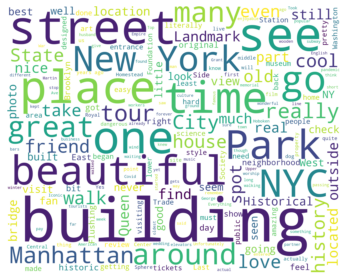

In [ ]:
wc.generate(text)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()